In [217]:
# Importing Libraries.

import csv
import pandas as pd
import matplotlib.dates as mdates
from matplotlib import pyplot as plt

In [6]:
trans_df = pd.read_csv('QVI_transaction_data.csv')
purchase_df = pd.read_csv('QVI_purchase_behaviour.csv')
print(trans_df.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [7]:
# Fixing Date Column.

trans_df["DATE"] = pd.to_datetime(trans_df["DATE"], origin="1899-12-30", unit="D")

In [8]:
print(trans_df.head(10))

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   
5 2019-05-19          4            4074    2982        57   
6 2019-05-16          4            4149    3333        16   
7 2019-05-16          4            4196    3539        24   
8 2018-08-20          5            5026    4525        42   
9 2018-08-18          7            7150    6900        52   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       

In [9]:
# Renaming Columns.

trans_df.columns = ['Date', 'Store_Number', 'Loyalty_Card_Number', 'Transaction_ID', 'Product_Number', 'Product_Name', 'Product_Quantity', 'Total_Sales']

In [10]:
print(trans_df.head(10))

        Date  Store_Number  Loyalty_Card_Number  Transaction_ID  \
0 2018-10-17             1                 1000               1   
1 2019-05-14             1                 1307             348   
2 2019-05-20             1                 1343             383   
3 2018-08-17             2                 2373             974   
4 2018-08-18             2                 2426            1038   
5 2019-05-19             4                 4074            2982   
6 2019-05-16             4                 4149            3333   
7 2019-05-16             4                 4196            3539   
8 2018-08-20             5                 5026            4525   
9 2018-08-18             7                 7150            6900   

   Product_Number                              Product_Name  Product_Quantity  \
0               5    Natural Chip        Compny SeaSalt175g                 2   
1              66                  CCs Nacho Cheese    175g                 3   
2              61  

In [11]:
# Checking for Null Values.

print(trans_df.isnull().sum())

Date                   0
Store_Number           0
Loyalty_Card_Number    0
Transaction_ID         0
Product_Number         0
Product_Name           0
Product_Quantity       0
Total_Sales            0
dtype: int64


In [12]:
# Fixing String Formatting in the Product Name Column.

trans_df["Product_Name"] = trans_df["Product_Name"].str.split().str.join(" ")

In [13]:
print(trans_df.head(10))

        Date  Store_Number  Loyalty_Card_Number  Transaction_ID  \
0 2018-10-17             1                 1000               1   
1 2019-05-14             1                 1307             348   
2 2019-05-20             1                 1343             383   
3 2018-08-17             2                 2373             974   
4 2018-08-18             2                 2426            1038   
5 2019-05-19             4                 4074            2982   
6 2019-05-16             4                 4149            3333   
7 2019-05-16             4                 4196            3539   
8 2018-08-20             5                 5026            4525   
9 2018-08-18             7                 7150            6900   

   Product_Number                              Product_Name  Product_Quantity  \
0               5           Natural Chip Compny SeaSalt175g                 2   
1              66                     CCs Nacho Cheese 175g                 3   
2              61  

In [14]:
# Checking for outliers in the 'Total_Sales' Column

Q1 = trans_df['Total_Sales'].quantile(0.25)
Q3 = trans_df['Total_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print(trans_df[(trans_df['Total_Sales'] <= lower_bound) & (trans_df['Total_Sales'] >= upper_bound)])


Empty DataFrame
Columns: [Date, Store_Number, Loyalty_Card_Number, Transaction_ID, Product_Number, Product_Name, Product_Quantity, Total_Sales]
Index: []


In [15]:
# Checking for duplicates
print(trans_df.duplicated().sum()) 

1


In [16]:
print(trans_df[trans_df.duplicated(keep=False)])

             Date  Store_Number  Loyalty_Card_Number  Transaction_ID  \
124843 2018-10-01           107               107024          108462   
124845 2018-10-01           107               107024          108462   

        Product_Number                          Product_Name  \
124843              45  Smiths Thinly Cut Roast Chicken 175g   
124845              45  Smiths Thinly Cut Roast Chicken 175g   

        Product_Quantity  Total_Sales  
124843                 2          6.0  
124845                 2          6.0  


In [17]:
# Dropping duplicates
trans_df.drop_duplicates(inplace=True)
print(trans_df.duplicated().sum())

0


In [18]:
print(purchase_df.head(10))

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
5            1007   YOUNG SINGLES/COUPLES           Budget
6            1009            NEW FAMILIES          Premium
7            1010   YOUNG SINGLES/COUPLES       Mainstream
8            1011   OLDER SINGLES/COUPLES       Mainstream
9            1012          OLDER FAMILIES       Mainstream


In [19]:
# Renaming Columns in Purchase df.

purchase_df.columns = ['Loyalty_Card_Number', 'Life_Stage', 'Customer_Type']
print(purchase_df.head(10))

   Loyalty_Card_Number              Life_Stage Customer_Type
0                 1000   YOUNG SINGLES/COUPLES       Premium
1                 1002   YOUNG SINGLES/COUPLES    Mainstream
2                 1003          YOUNG FAMILIES        Budget
3                 1004   OLDER SINGLES/COUPLES    Mainstream
4                 1005  MIDAGE SINGLES/COUPLES    Mainstream
5                 1007   YOUNG SINGLES/COUPLES        Budget
6                 1009            NEW FAMILIES       Premium
7                 1010   YOUNG SINGLES/COUPLES    Mainstream
8                 1011   OLDER SINGLES/COUPLES    Mainstream
9                 1012          OLDER FAMILIES    Mainstream


In [20]:
# Fixing capitilisation in Life Stage Column.

purchase_df['Life_Stage'] = purchase_df['Life_Stage'].str.capitalize()
print(purchase_df.head(10))

   Loyalty_Card_Number              Life_Stage Customer_Type
0                 1000   Young singles/couples       Premium
1                 1002   Young singles/couples    Mainstream
2                 1003          Young families        Budget
3                 1004   Older singles/couples    Mainstream
4                 1005  Midage singles/couples    Mainstream
5                 1007   Young singles/couples        Budget
6                 1009            New families       Premium
7                 1010   Young singles/couples    Mainstream
8                 1011   Older singles/couples    Mainstream
9                 1012          Older families    Mainstream


In [21]:
print(purchase_df.duplicated().sum())

0


In [22]:
# Merging the 2 cleaned datasets

merged_df = pd.merge(trans_df, purchase_df)
print(merged_df)

             Date  Store_Number  Loyalty_Card_Number  Transaction_ID  \
0      2018-10-17             1                 1000               1   
1      2019-05-14             1                 1307             348   
2      2018-11-10             1                 1307             346   
3      2019-03-09             1                 1307             347   
4      2019-05-20             1                 1343             383   
...           ...           ...                  ...             ...   
264830 2019-03-09           272               272319          270088   
264831 2018-08-13           272               272358          270154   
264832 2018-11-06           272               272379          270187   
264833 2018-12-27           272               272379          270188   
264834 2018-09-22           272               272380          270189   

        Product_Number                             Product_Name  \
0                    5          Natural Chip Compny SeaSalt175g   
1

In [259]:
print('This dataset encompasses sales data from the following period:')
print(merged_df['Date'].min())
print(merged_df['Date'].max())

This dataset encompasses sales data from the following period:
2018-07-01 00:00:00
2019-06-30 00:00:00


In [24]:
# Total Sales Revenue.

print('The total sales revenue for the period 2018-07-01 - 2019-06-30 was: $' + str(merged_df['Total_Sales'].sum()))

The total sales revenue for the period 2018-07-01 - 2019-06-30 was: $1934409.0


In [25]:
# Product Analysis.

print('We have ' + str(merged_df['Product_Name'].nunique()) + ' unique products.')

We have 114 unique products.


In [379]:
best_sellers = merged_df.groupby('Product_Name').Total_Sales.sum().reset_index()
best_sellers_sorted = best_sellers.sort_values('Total_Sales', ascending=False) 
top_5_best_sellers = best_sellers_sorted.iloc[0:5]
top_5_worst_sellers = best_sellers_sorted.iloc[-5:]
print("The top 5 best performing products by total sales revenue are shown below: " + "\n" + "\n" + str(top_5_best_sellers))
print("\n" + "The 5 lowest performing products by total sales revenue are shown below: " + "\n" + "\n" + str(top_5_worst_sellers.iloc[-5:]))

The top 5 best performing products by total sales revenue are shown below: 

                                Product_Name  Total_Sales
11              Dorito Corn Chp Supreme 380g      40352.0
86     Smiths Crnkle Chip Orgnl Big Bag 380g      36367.6
76  Smiths Crinkle Chips Salt & Vinegar 330g      34804.2
33      Kettle Mozzarella Basil & Pesto 175g      34457.4
85              Smiths Crinkle Original 330g      34302.6

The 5 lowest performing products by total sales revenue are shown below: 

                              Product_Name  Total_Sales
104            WW Crinkle Cut Chicken 175g       4702.2
90   Sunbites Whlegrn Crisps Frch/Onin 90g       4600.2
105           WW Crinkle Cut Original 175g       4532.2
113             Woolworths Mild Salsa 300g       4234.5
112           Woolworths Medium Salsa 300g       4050.0


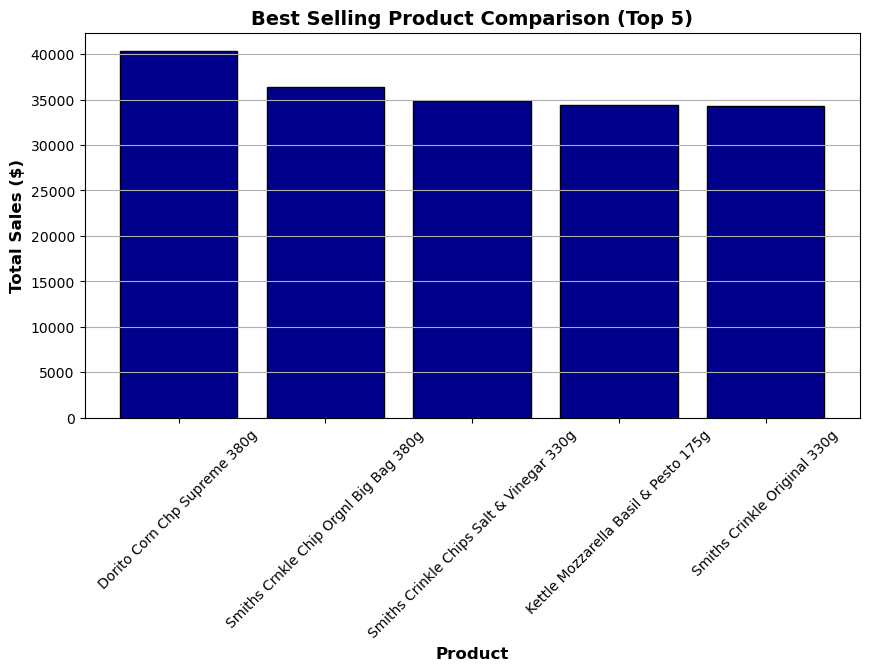

In [313]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top_5_best_sellers['Product_Name'], top_5_best_sellers['Total_Sales'], color='darkblue', edgecolor='black')
plt.title('Best Selling Product Comparison (Top 5)', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()                  

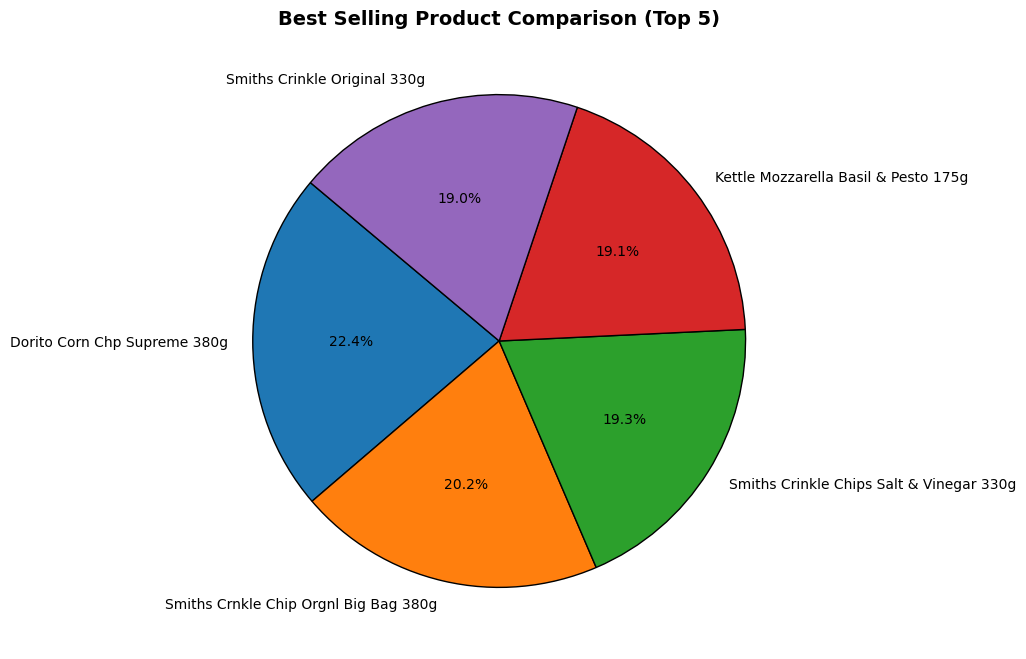

The above graph is once more visualising the top 5 performing products across the entire sales period. The pie chart helps to more clearly visualise their performance relative to one another.
It should be noted these percentages are not a percent of our total sales volume, rather a percent of the total sales volume of these 5 products.


In [299]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_5_best_sellers['Total_Sales'], labels=top_5_best_sellers['Product_Name'], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Best Selling Product Comparison (Top 5)", fontsize=14, fontweight='bold')
plt.show()
print('The above graph is once more visualising the top 5 performing products across the entire sales period. The pie chart helps to more clearly visualise their performance relative to one another.')
print('It should be noted these percentages are not a percent of our total sales volume, rather a percent of the total sales volume of these 5 products.')



In [169]:
# Weight Analysis.

best_sellers_sorted["Product_Weight"] = best_sellers_sorted["Product_Name"].str.extract(r'(\d+)g')
best_sellers_sorted["Product_Weight"] = best_sellers_sorted["Product_Weight"].astype(float)

top_10 = best_sellers_sorted.iloc[0:10]
print('The average weight of the top 10 best selling chips is ' + str(top_10['Product_Weight'].mean()) + 'g.')

top_20 = best_sellers_sorted.iloc[0:20]
print('The average weight of the top 20 best selling chips is ' + str(top_20['Product_Weight'].mean()) + 'g.')

top_30 = best_sellers_sorted.iloc[0:30]
print('The average weight of the top 30 best selling chips is ' + str(top_30['Product_Weight'].mean()) + 'g.')

print('\n' + 'The average weight of a family sized sharing bag of chips in the US is ~ 235g. Our analysis here shows that larger sharing bags are the most popular.')
print('4 of our top 5 are above 300g. Our focus moving forwards should be on family/sharing bags and above.')
print("Marketing direction should lean into this. Running ads around sharing / parties / big events. 'Food for the occasion.'")


The average weight of the top 10 best selling chips is 278.0g.
The average weight of the top 20 best selling chips is 245.0g.
The average weight of the top 30 best selling chips is 222.16666666666666g.

The average weight of a family sized sharing bag of chips in the US is ~ 235g. Our analysis here shows that larger sharing bags are the most popular.
4 of our top 5 are above 300g. Our focus moving forwards should be on family/sharing bags and above.
Marketing direction should lean into this. Running ads around sharing / parties / big events. 'Food for the occasion.'


In [249]:
# Best Selling Brands.

best_sellers_sorted["Brand"] = best_sellers_sorted["Product_Name"].str.extract(r'^(\w+)')
top_10_brands = (best_sellers_sorted['Brand'].iloc[0:10])
print('The following table shows the brand of each of our top 10 best selling products:')
print(top_10_brands)

The following table shows the brand of each of our top 10 best selling products:
11      Dorito
86      Smiths
76      Smiths
33      Kettle
85      Smiths
6     Cheezels
12     Doritos
39      Kettle
34      Kettle
35      Kettle
Name: Brand, dtype: object


In [251]:
brand_sales = best_sellers_sorted.groupby('Brand').Total_Sales.sum().reset_index()
sorted_brand_sales = brand_sales.sort_values('Total_Sales', ascending=False)
top_5_brand_sales = sorted_brand_sales.iloc[0:5]
print('The following table shows the top 5 performing brands by sales volume across the entire period:')
print(top_5_brand_sales)

The following table shows the top 5 performing brands by sales volume across the entire period:
       Brand  Total_Sales
12    Kettle     390239.8
20    Smiths     210070.8
6    Doritos     201538.9
16  Pringles     177655.5
15       Old      90785.1


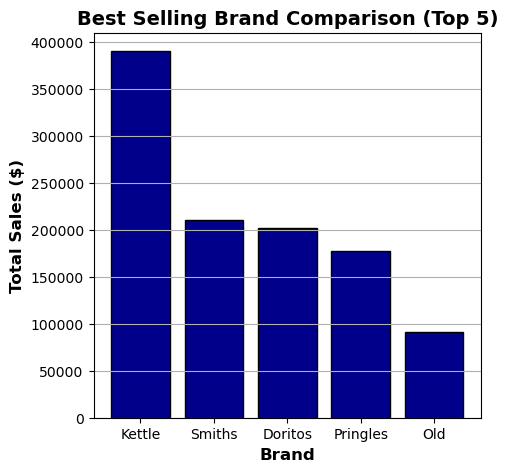

The above graph is to visualise the data from the previous table, comparing the top 5 performing brands across the entire sales period.


In [305]:
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(top_5_brand_sales['Brand'], top_5_brand_sales['Total_Sales'], color='darkblue', edgecolor='black')
plt.title('Best Selling Brand Comparison (Top 5)', fontsize=14, fontweight='bold')
plt.xlabel('Brand', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.grid(axis='y')
plt.show()
print('The above graph is to visualise the data from the previous table, comparing the top 5 performing brands across the entire sales period.')


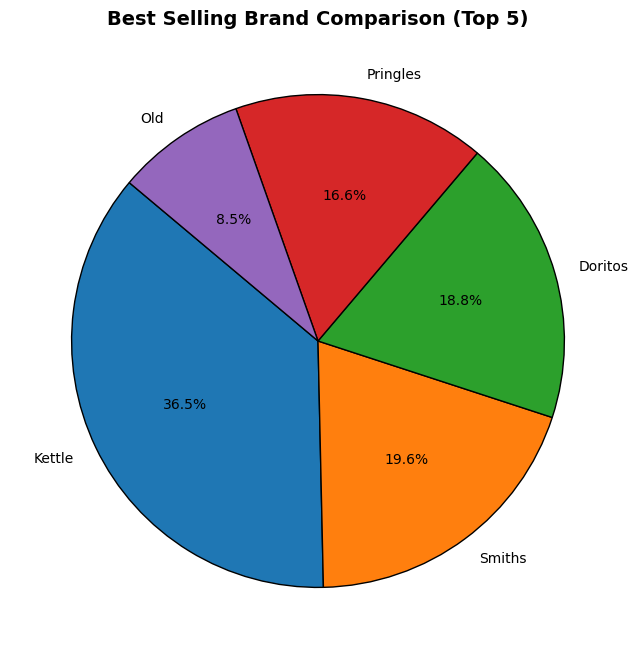

The above graph is once more visualising the top 5 performing brands across the entire sales period. The pie chart helps to more clearly visualise their performance relative to one another.
It should be noted these percentages are not a percent of our total sales volume, rather a percent of the total sales volume of these 5 brands.


In [317]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_5_brand_sales['Total_Sales'], labels=top_5_brand_sales['Brand'], autopct='%1.1f%%',startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Best Selling Brand Comparison (Top 5)", fontsize=14, fontweight='bold')
plt.show()
print('The above graph is once more visualising the top 5 performing brands across the entire sales period. The pie chart helps to more clearly visualise their performance relative to one another.')
print('It should be noted these percentages are not a percent of our total sales volume, rather a percent of the total sales volume of these 5 brands.')

In [27]:
# Store Comparison.

print("We have " + str(merged_df['Store_Number'].nunique()) + " total stores.")

We have 272 total stores.


In [28]:
stores = merged_df.groupby('Store_Number').Total_Sales.sum().reset_index()
store_sorted = stores.sort_values(by='Total_Sales')
print('The 5 lowest performing stores as measured by total sales are the following: ' + "\n" + "\n"  + str(store_sorted.iloc[0:5]))
print("\n" + 'The 5 highest performing stores as measured by total sales are the following: ' + "\n" + "\n"  + str(store_sorted.iloc[-5:]))

The 5 lowest performing stores as measured by total sales are the following: 

     Store_Number  Total_Sales
210           211          5.2
75             76          6.0
10             11          6.7
251           252          7.4
205           206          7.6

The 5 highest performing stores as measured by total sales are the following: 

     Store_Number  Total_Sales
236           237     15539.50
39             40     15559.50
164           165     15973.75
87             88     16333.25
225           226     18905.45


In [375]:
transactions_per_store = merged_df.groupby('Store_Number').Transaction_ID.count().reset_index()
sorted_transactions_per_store = transactions_per_store.sort_values('Transaction_ID', ascending=False)

top_5_store_transactions = sorted_transactions_per_store.iloc[0:5]
top_5_store_transactions.columns=['Store_Number', 'Number_of_Transactions']
bottom_5_store_transactions = sorted_transactions_per_store.iloc[-5:]
bottom_5_store_transactions.columns=['Store_Number', 'Number_of_Transactions']

print('The top 5 stores with the highest number of transactions are shown below:' + '\n')
print(top_5_store_transactions)
print('\n' + 'The 5 stores with the lowest number of transactions are shown below:' + '\n')
print(bottom_5_store_transactions)

The top 5 stores with the highest number of transactions are shown below:

     Store_Number  Number_of_Transactions
225           226                    2022
87             88                    1873
92             93                    1832
164           165                    1819
236           237                    1785

The 5 stores with the lowest number of transactions are shown below:

     Store_Number  Number_of_Transactions
251           252                       2
10             11                       2
210           211                       2
91             92                       1
75             76                       1


In [321]:
# Life Stage Comparison.

print("Our customers are organised into the following 'life stage' groups:" + "\n")
print(merged_df['Life_Stage'].unique())

Our customers are organised into the following 'life stage' groups:

['Young singles/couples' 'Midage singles/couples' 'New families'
 'Older families' 'Older singles/couples' 'Retirees' 'Young families']


In [30]:
life_stage = merged_df.groupby('Life_Stage').Total_Sales.sum().reset_index()
life_stage_sorted = life_stage.sort_values(by='Total_Sales')
print('The Total sales revenue generated from the different life stage categories are shown below: ' + "\n" + "\n"  +str(life_stage_sorted))

The Total sales revenue generated from the different life stage categories are shown below: 

               Life_Stage  Total_Sales
1            New families     50433.45
0  Midage singles/couples    184751.30
6   Young singles/couples    260405.30
5          Young families    316160.10
2          Older families    353767.20
4                Retirees    366470.90
3   Older singles/couples    402420.75


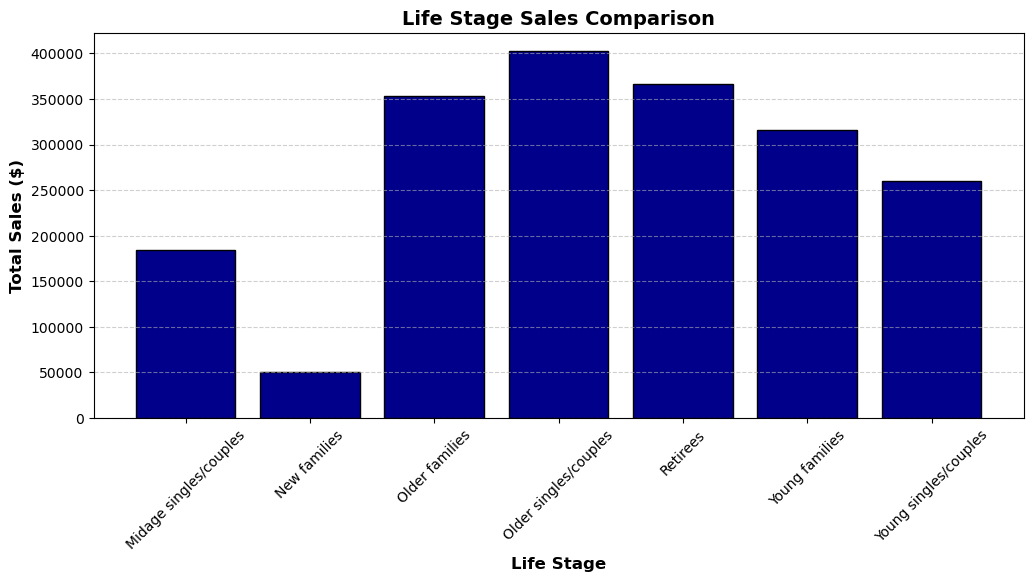

In [103]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.bar(life_stage['Life_Stage'], life_stage['Total_Sales'], color='darkblue', edgecolor='black')
plt.title('Life Stage Sales Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Life Stage', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [31]:
# Monthly Sales Performance

month_performance = merged_df.groupby(merged_df['Date'].dt.to_period('M')).Total_Sales.sum().reset_index()
sorted_month_performance = month_performance.sort_values('Total_Sales', ascending=False)
print("The total sales revenue by month is shown below: " + "\n" + "\n" + str(sorted_month_performance))

The total sales revenue by month is shown below: 

       Date  Total_Sales
5   2018-12    167913.40
8   2019-03    166265.20
0   2018-07    165275.30
3   2018-10    164409.70
6   2019-01    162642.30
11  2019-06    160538.60
2   2018-09    160522.00
4   2018-11    160233.70
9   2019-04    159845.10
1   2018-08    158731.05
10  2019-05    157367.65
7   2019-02    150665.00


In [32]:
sorted_month_performance['Date'] = sorted_month_performance['Date'].dt.to_timestamp()

In [325]:
month_performance['Date'] = month_performance['Date'].dt.to_timestamp()

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

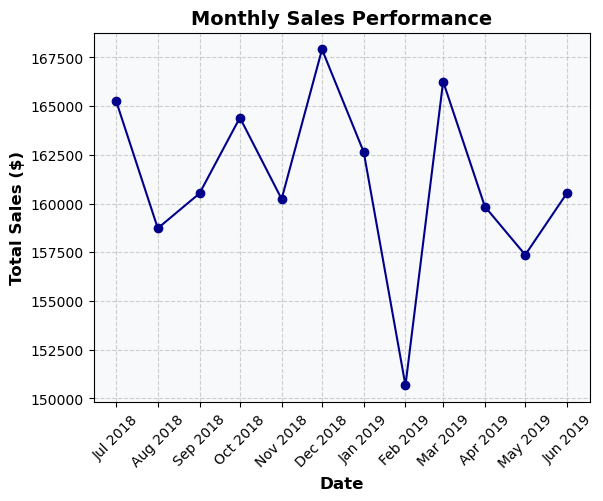

In [329]:
fig, ax = plt.subplots()
x_values = month_performance['Date']
y_values = month_performance['Total_Sales']
ax.plot(x_values, y_values, marker='o', color='darkblue')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
plt.title('Monthly Sales Performance', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#f8f9fa')

plt.show()

In [331]:
# Customer Type Comparison.

print(merged_df['Customer_Type'].unique())

['Premium' 'Budget' 'Mainstream']


In [44]:
customer_types = merged_df.groupby('Customer_Type').Total_Sales.sum().reset_index()
sorted_customer_types = customer_types.sort_values('Total_Sales', ascending=False)
print(sorted_customer_types)

  Customer_Type  Total_Sales
1    Mainstream    750744.50
0        Budget    676211.55
2       Premium    507452.95


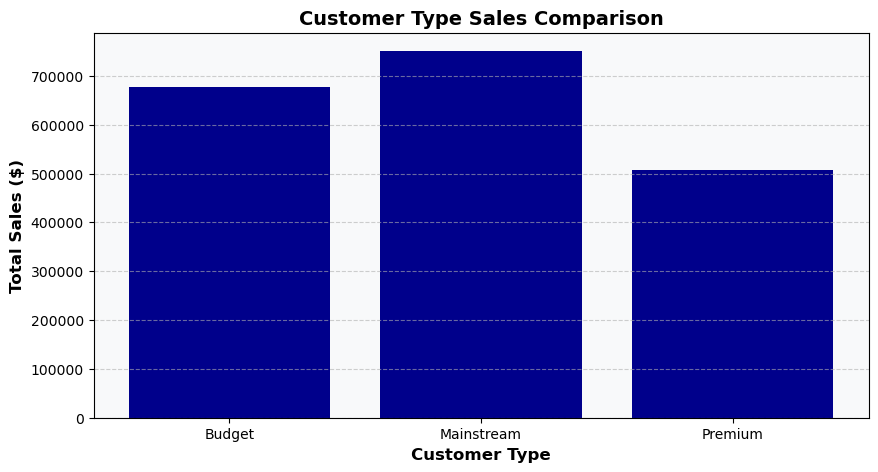

In [303]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(customer_types['Customer_Type'], customer_types['Total_Sales'], color='darkblue')
plt.title('Customer Type Sales Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Customer Type', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().set_facecolor('#f8f9fa')
plt.show()

In [377]:
# Top 5 Customers.

customers = merged_df.groupby('Loyalty_Card_Number').Transaction_ID.count().reset_index()
sorted_customers = customers.sort_values('Transaction_ID', ascending=False)
sorted_customers.columns=['Loyalty_Card_Number', 'Number_of_Transactions']
print('Below are our top 5 customers ordered by number of transactions associated with their loyalty card:' + '\n')
print(sorted_customers.iloc[0:5])

Below are our top 5 customers ordered by number of transactions associated with their loyalty card:

       Loyalty_Card_Number  Number_of_Transactions
45905               172032                      18
42813               162039                      18
3686                 13138                      17
60925               230078                      17
31654               116181                      17
